In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [2]:
numerical = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/lab-random-forests/numerical.csv')
categorical = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/lab-random-forests/categorical.csv')
target = pd.read_csv('/Users/lenovo1/Downloads/Ironhack/lab-random-forests/target.csv')

display(numerical.head())
display(numerical.shape)
display(categorical.head())
display(categorical.shape)
display(target.head())
target.shape

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


(95412, 315)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


(95412, 22)

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


(95412, 2)

In [3]:
categorical.nunique()

STATE           12
CLUSTER         53
HOMEOWNR         2
GENDER           3
DATASRCE         3
RFA_2R           1
RFA_2A           4
GEOCODE2         4
DOMAIN_A         5
DOMAIN_B         4
ODATEW_YR       15
ODATEW_MM       12
DOB_YR          96
DOB_MM          12
MINRDATE_YR     20
MINRDATE_MM     12
MAXRDATE_YR     18
MAXRDATE_MM     12
LASTDATE_YR      3
LASTDATE_MM     12
FIRSTDATE_YR    26
FIRSTDATE_MM    12
dtype: int64

In [4]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()
encoder.fit(categorical)
encoded = encoder.transform(categorical).toarray()
cate_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [5]:
X = pd.concat([numerical,cate_encoded],axis=1)
y = target

# Apply the Random Forest algorithm to predict the TARGET_B. Please note that this column suffers from class imbalance. Fix the class imbalance using upsampling.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) 
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12
4398,0.000000,0.670103,0.500000,0.000000,0.004149,0.000000,0.292929,0.151515,0.484848,0.080808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90538,0.000000,0.624862,0.666667,1.000000,0.000000,0.010101,0.373737,0.333333,0.333333,0.080808,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16147,0.000017,0.443299,0.666667,0.444444,0.112033,0.000000,0.323232,0.393939,0.404040,0.050505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65008,0.000000,0.432990,0.833333,1.000000,0.053942,0.010101,0.454545,0.373737,0.111111,0.050505,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52515,0.000034,0.845361,0.666667,0.444444,0.016598,0.000000,0.464646,0.262626,0.515152,0.141414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=5)

y_train_true = y_train.drop(columns='TARGET_D')
y_test_true = y_test.drop(columns='TARGET_D')

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train_true)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_SMOTE, y_train_SMOTE)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE, y_train_SMOTE)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_scaled, y_test_true)))

y_pred = clf.predict(X_test_scaled)
display(y_test_true.value_counts())
display(confusion_matrix(y_test_true, y_pred))

/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The R2 for the Random Forest in the TRAIN set is 0.87
The R2 for the Random Forest in the TEST  set is 0.82


TARGET_B
0           22599
1            1254
dtype: int64

array([[19330,  3269],
       [ 1006,   248]])

In [9]:
y_pred_pd = pd.DataFrame(y_pred)
y_test_pd = pd.DataFrame(y_test)

In [10]:
y_test_pd.reset_index(inplace=True)
y_test_pd.head()

,index,TARGET_B,TARGET_D
0,58053,0,0.0
1,9484,0,0.0
2,13395,0,0.0
3,1466,0,0.0
4,2076,0,0.0


In [11]:
y_pred_pd.columns=['Pred_B']
y_pred_pd.head()

,Pred_B
0,1
1,0
2,0
3,0
4,0


In [12]:
y_test2 = pd.concat([y_test_pd,y_pred_pd],axis=1)
y_test2.head()

,index,TARGET_B,TARGET_D,Pred_B
0,58053,0,0.0,1
1,9484,0,0.0,0
2,13395,0,0.0,0
3,1466,0,0.0,0
4,2076,0,0.0,0


In [13]:
y_fp = y_test2[['TARGET_D']][(y_test2['TARGET_B']==0)&(y_test2['Pred_B']==1)]
y_fn = y_test2[['TARGET_D']][(y_test2['TARGET_B']==1)&(y_test2['Pred_B']==0)]

In [14]:
display(round(y_fn.sum()[0],0))
y_fn.head()

16953.0

,TARGET_D
28,12.0
43,50.0
52,25.0
63,10.0
97,10.0


In [15]:
donote_median = y_test2[y_test2['TARGET_B']==1]['TARGET_D'].median()
donote_mean = y_test2[y_test2['TARGET_B']==1]['TARGET_D'].mean()

print(donote_median,round(donote_mean,0))
print(donote_median*y_fp.shape[0],round(donote_mean*y_fp.shape[0],0))

14.0 16.0
45766.0 52433.0


# Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one? Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metric of interest in this case.

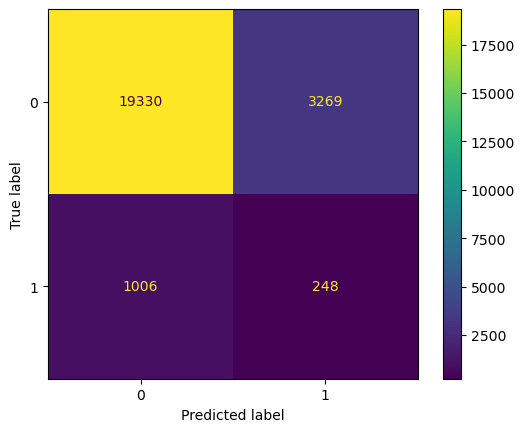

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
max_depth_choices= [3,5]
min_samples_split_choices = [10,20] 
min_samples_leaf_choices = [10,20] 

In [18]:
grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [19]:
model = RandomForestClassifier(max_samples=0.8,random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [ ]:
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/lenovo1/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was pa

In [ ]:
display(grid_search.best_params_)
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))